In [6]:
# various libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [10]:
# load Dataset

In [114]:
df = pd.read_csv("AmazonSalesData.csv")
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [14]:
df.tail()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
95,Sub-Saharan Africa,Mali,Clothes,Online,M,7/26/2011,512878119,9/3/2011,888,109.28,35.84,97040.64,31825.92,65214.72
96,Asia,Malaysia,Fruits,Offline,L,11/11/2011,810711038,12/28/2011,6267,9.33,6.92,58471.11,43367.64,15103.47
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,6/1/2016,728815257,6/29/2016,1485,154.06,90.93,228779.10,135031.05,93748.05
98,North America,Mexico,Personal Care,Offline,M,7/30/2015,559427106,8/8/2015,5767,81.73,56.67,471336.91,326815.89,144521.02
99,Sub-Saharan Africa,Mozambique,Household,Offline,L,2/10/2012,665095412,2/15/2012,5367,668.27,502.54,3586605.09,2697132.18,889472.91


In [16]:
df.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

In [19]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
# Data Preprocessing

In [23]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [25]:
# Missing Value

In [27]:
print(df.isnull().sum())

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64


In [29]:
# Convert categorical order priority to binary for logistic regression

In [31]:
df['high_priority'] = df['Order Priority'].apply(lambda x: 1 if x in ['H', 'C'] else 0)

In [ ]:
# Encode categorical features

In [35]:
df_encoded = pd.get_dummies(df, columns=['Region', 'Country', 'Item Type', 'Sales Channel'], drop_first=True)

In [37]:
# Logistic Regression: Predict High Priority Orders

In [39]:
features = ['Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'] + \
           [col for col in df_encoded.columns if col.startswith(('Region', 'Country', 'Item Type', 'Sales Channel'))]

In [41]:
X = df_encoded[features]
y = df_encoded['high_priority']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [47]:
y_pred = model.predict(X_test)

In [49]:
# Results

In [51]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[9 1]
 [3 7]]

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.90      0.82        10
           1       0.88      0.70      0.78        10

    accuracy                           0.80        20
   macro avg       0.81      0.80      0.80        20
weighted avg       0.81      0.80      0.80        20



In [53]:
# Time Series Forecasting: Forecast Total Profit

In [55]:
# Aggregate profit by date

In [57]:
daily_profit = df.groupby('Order Date')['Total Profit'].sum().asfreq('D').fillna(0)

In [ ]:
# Train-test split (e.g., until end of 2024)

In [59]:
train = daily_profit[:'2024-12-31']
test = daily_profit['2025-01-01':]

In [91]:
# Holt-Winters Forecasting

In [93]:
print("Date range in data:", daily_profit.index.min(), "to", daily_profit.index.max())

Date range in data: 2010-02-02 00:00:00 to 2017-05-22 00:00:00


In [95]:
test = daily_profit['2025-01-01':]

In [97]:
# Split by index (e.g., 80% train, 20% test)
split_point = int(len(daily_profit) * 0.8)
train = daily_profit.iloc[:split_point]
test = daily_profit.iloc[split_point:]

# Check test index
print(test.index[0], test.index[-1])

2015-12-06 00:00:00 2017-05-22 00:00:00


C:\Users\MUKHERJEE\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


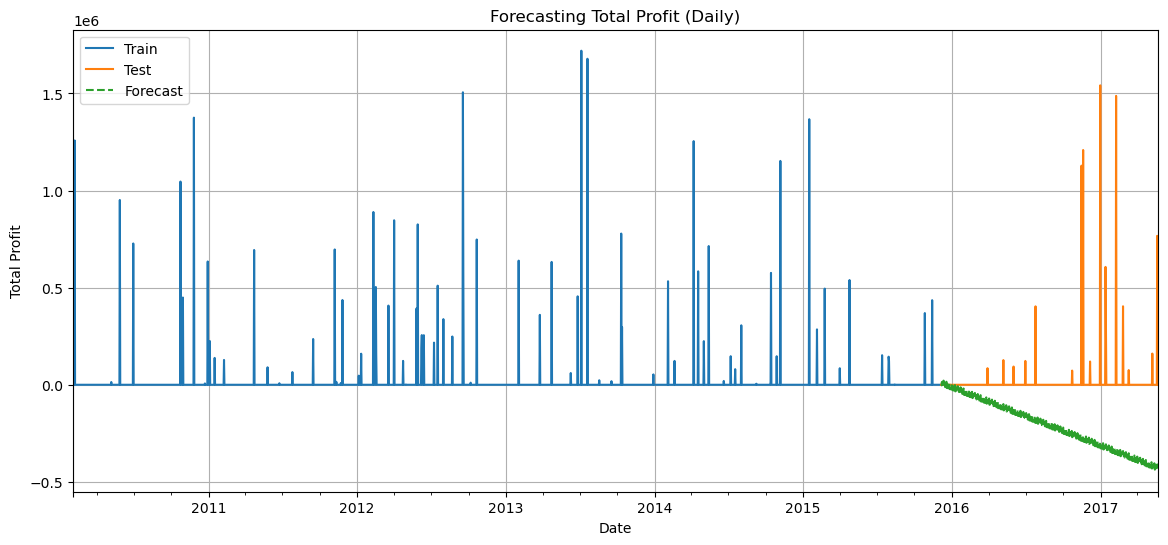

In [99]:
# Build and fit the model
model_hw = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=7)
fit = model_hw.fit()

# Forecast using .predict with test index range
start_date = test.index[0]
end_date = test.index[-1]

forecast = fit.predict(start=start_date, end=end_date)

# Plot results
plt.figure(figsize=(14, 6))
train.plot(label='Train')
test.plot(label='Test')
forecast.plot(label='Forecast', style='--')
plt.legend()
plt.title("Forecasting Total Profit (Daily)")
plt.xlabel("Date")
plt.ylabel("Total Profit")
plt.grid()
plt.show()

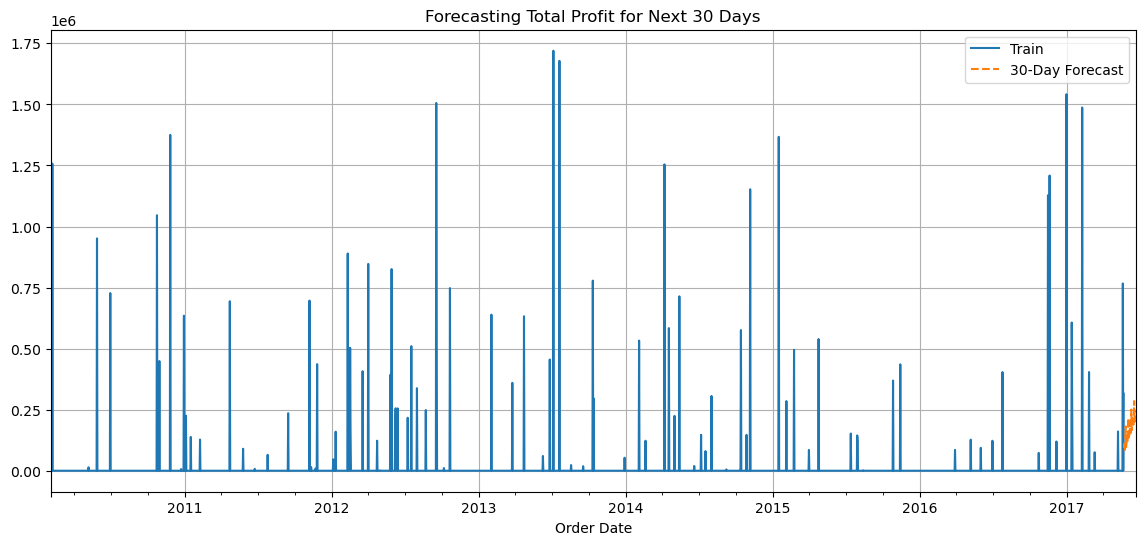

In [75]:
# Forecast for 30 future days
forecast = fit.forecast(steps=30)

# Create future date index
future_dates = pd.date_range(start=train.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')
forecast.index = future_dates

# Plot extended forecast
plt.figure(figsize=(14, 6))
train.plot(label='Train')
forecast.plot(label='30-Day Forecast', style='--')
plt.legend()
plt.title("Forecasting Total Profit for Next 30 Days")
plt.grid()
plt.show()

In [106]:
import pandas as pd

# Load the dataset
df = pd.read_csv('amazonsalesdata.csv')  # Replace with your actual file path

# Quick preview
print(df[['Total Revenue', 'Units Sold']].describe())

# Create a HighSales label based on Total Revenue being above the median
revenue_threshold = df['Total Revenue'].median()

df['HighSales'] = (df['Total Revenue'] > revenue_threshold).astype(int)

# Optional: Check label distribution
print(df['HighSales'].value_counts())

# Preview with label
print(df[['Total Revenue', 'HighSales']].head())

       Total Revenue   Units Sold
count   1.000000e+02   100.000000
mean    1.373488e+06  5128.710000
std     1.460029e+06  2794.484562
min     4.870260e+03   124.000000
25%     2.687212e+05  2836.250000
50%     7.523144e+05  5382.500000
75%     2.212045e+06  7369.000000
max     5.997055e+06  9925.000000
HighSales
1    50
0    50
Name: count, dtype: int64
   Total Revenue  HighSales
0     2533654.00          1
1      576782.80          0
2     1158502.59          1
3       75591.66          0
4     3296425.02          1


In [108]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# One-hot encode categorical features
df_encoded = pd.get_dummies(df, columns=['Region', 'Country', 'Item Type', 'Sales Channel'], drop_first=True)

# Select features
features = ['Units Sold', 'Unit Price', 'Unit Cost', 'Total Profit'] + \
           [col for col in df_encoded.columns if col.startswith(('Region_', 'Country_', 'Item Type_', 'Sales Channel_'))]

X = df_encoded[features]
y = df_encoded['HighSales']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 7  2]
 [ 0 11]]
              precision    recall  f1-score   support

           0       1.00      0.78      0.88         9
           1       0.85      1.00      0.92        11

    accuracy                           0.90        20
   macro avg       0.92      0.89      0.90        20
weighted avg       0.92      0.90      0.90        20



In [194]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [196]:
# Select numeric columns for clustering
features = ['Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit']
X = df[features].dropna()  # Drop rows with missing values

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [198]:
# Choose number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add the cluster label to the original data
X['Cluster'] = clusters

C:\Users\MUKHERJEE\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



In [200]:
# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for plotting
pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = clusters

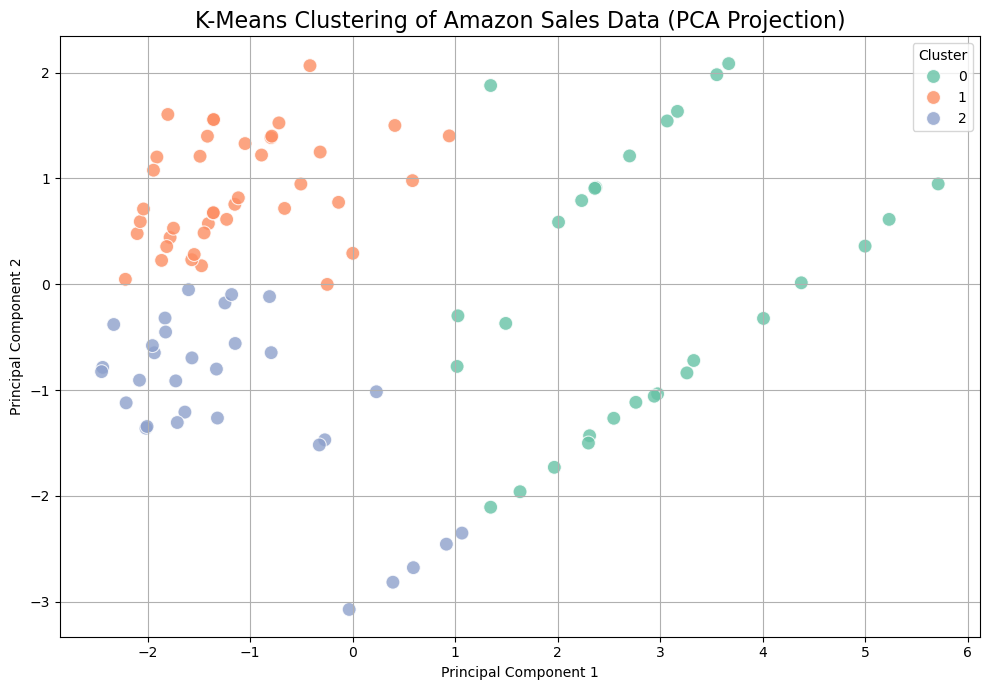

In [202]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='Set2', data=pca_df, s=100, alpha=0.8)
plt.title('K-Means Clustering of Amazon Sales Data (PCA Projection)', fontsize=16)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\MUKHERJEE\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\MUKHERJEE\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\MUKHERJEE\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\MUKHERJEE\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are l

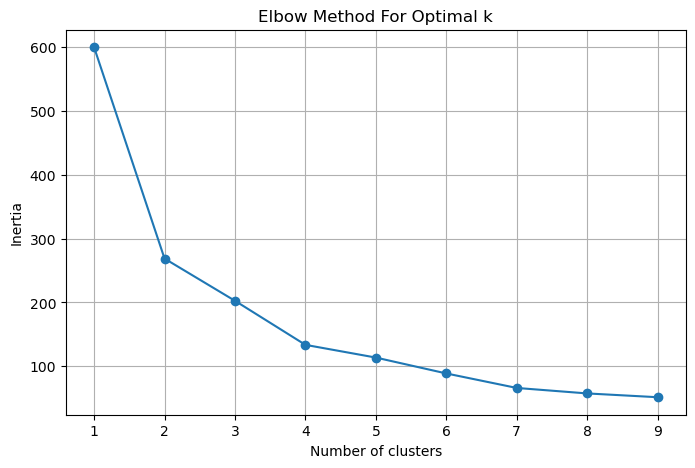

In [204]:
# Elbow method to find optimal k
inertia = []
for k in range(1, 10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

C:\Users\MUKHERJEE\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\MUKHERJEE\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\MUKHERJEE\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\MUKHERJEE\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\User

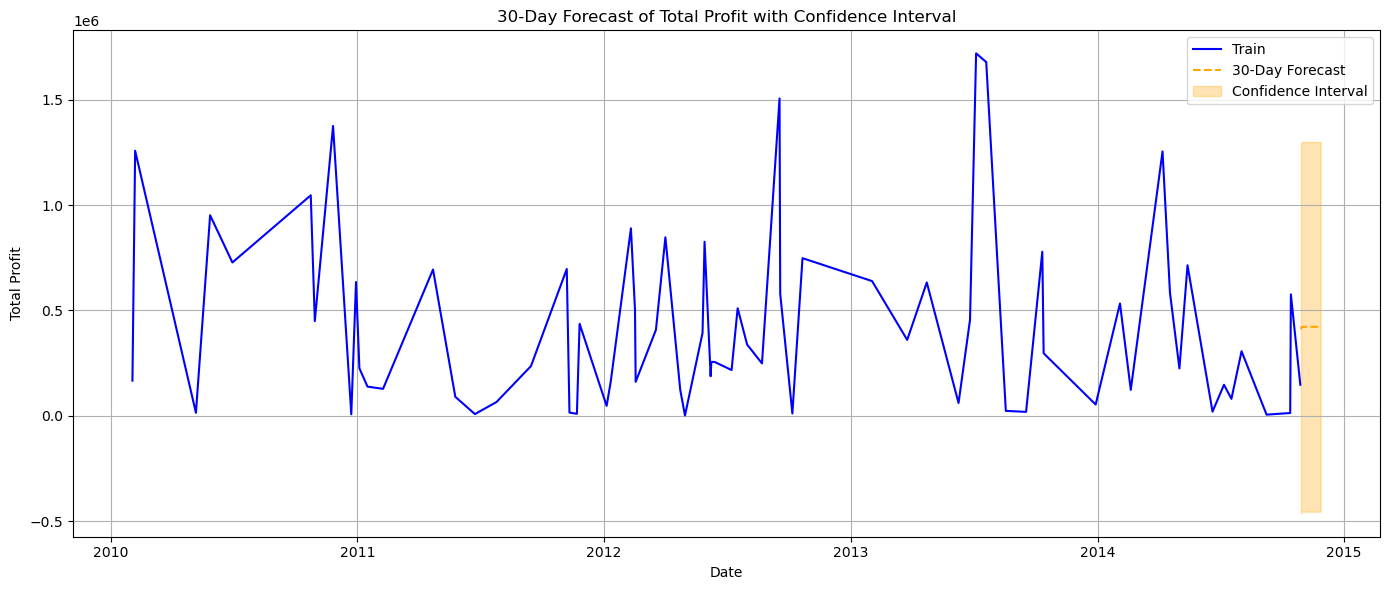

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX


# Ensure dates are datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Aggregate daily total profit
daily_profit = df.groupby('Order Date')['Total Profit'].sum()

# Sort index
daily_profit = daily_profit.sort_index()

# Split into training data
train = daily_profit[:-30]  # leave 30 days for testing (optional)

# Fit ARIMA model (can be tuned)
model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))
fit = model.fit(disp=False)

# Forecast with confidence intervals
forecast_results = fit.get_forecast(steps=30)
forecast = forecast_results.predicted_mean
conf_int = forecast_results.conf_int()

# Create future dates index
future_dates = pd.date_range(start=train.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')
forecast.index = future_dates
conf_int.index = future_dates

# Plot with ribbon
plt.figure(figsize=(14, 6))
plt.plot(train.index, train, label='Train', color='blue')
plt.plot(forecast.index, forecast, label='30-Day Forecast', color='orange', linestyle='--')

# Ribbon for confidence interval
plt.fill_between(forecast.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='orange', alpha=0.3, label='Confidence Interval')

plt.title("30-Day Forecast of Total Profit with Confidence Interval")
plt.xlabel("Date")
plt.ylabel("Total Profit")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

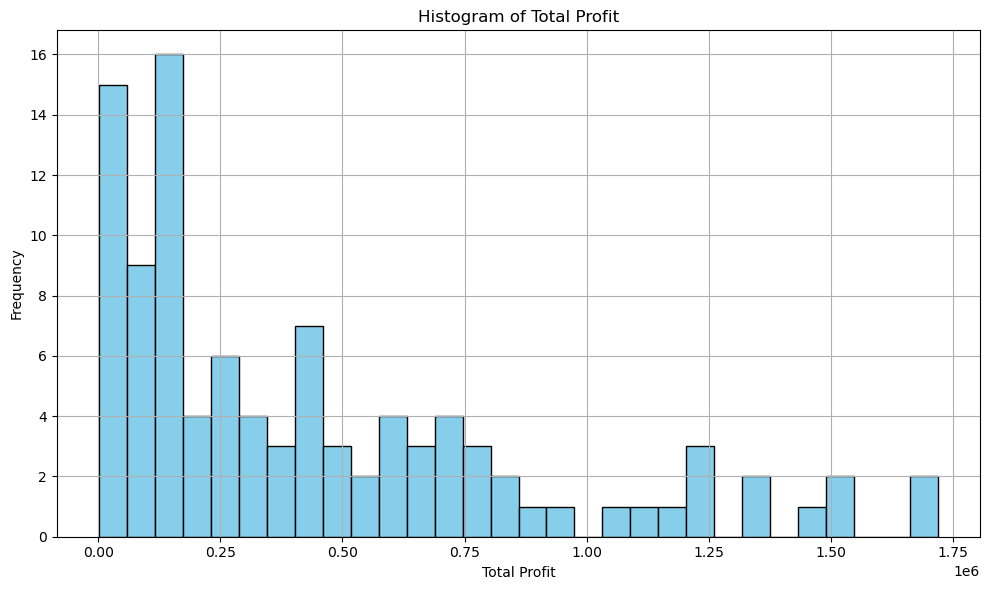

In [122]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data (adjust to your file path)
# AmazonSalesData = pd.read_csv('your_file.csv')

# Plot a histogram for 'Total Profit'
plt.figure(figsize=(10, 6))
plt.hist(df['Total Profit'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Total Profit')
plt.xlabel('Total Profit')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

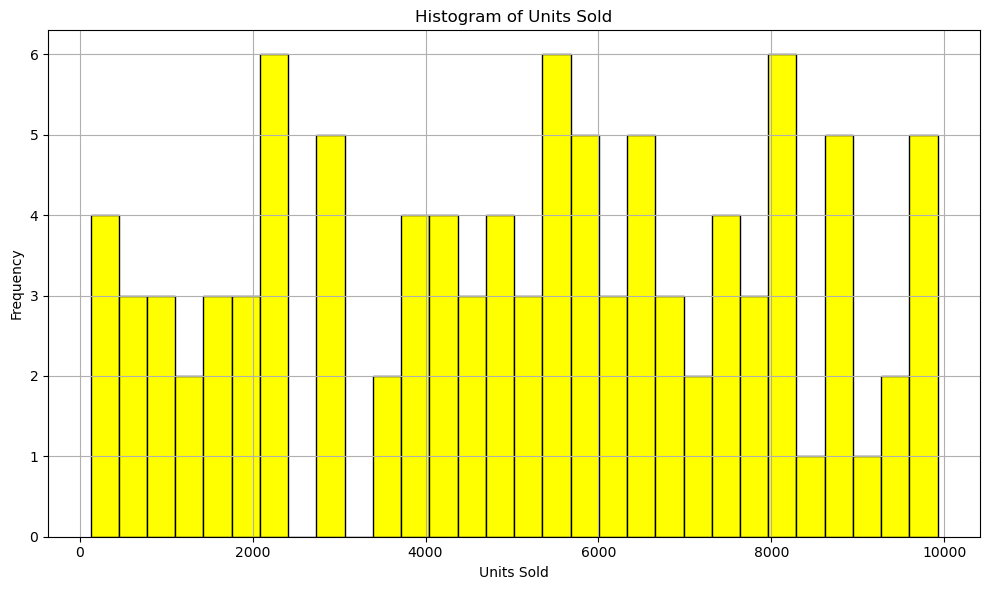

In [132]:
plt.figure(figsize=(10, 6))
plt.hist(df['Units Sold'], bins=30, color='Yellow', edgecolor='black')
plt.title('Histogram of Units Sold')
plt.xlabel('Units Sold')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

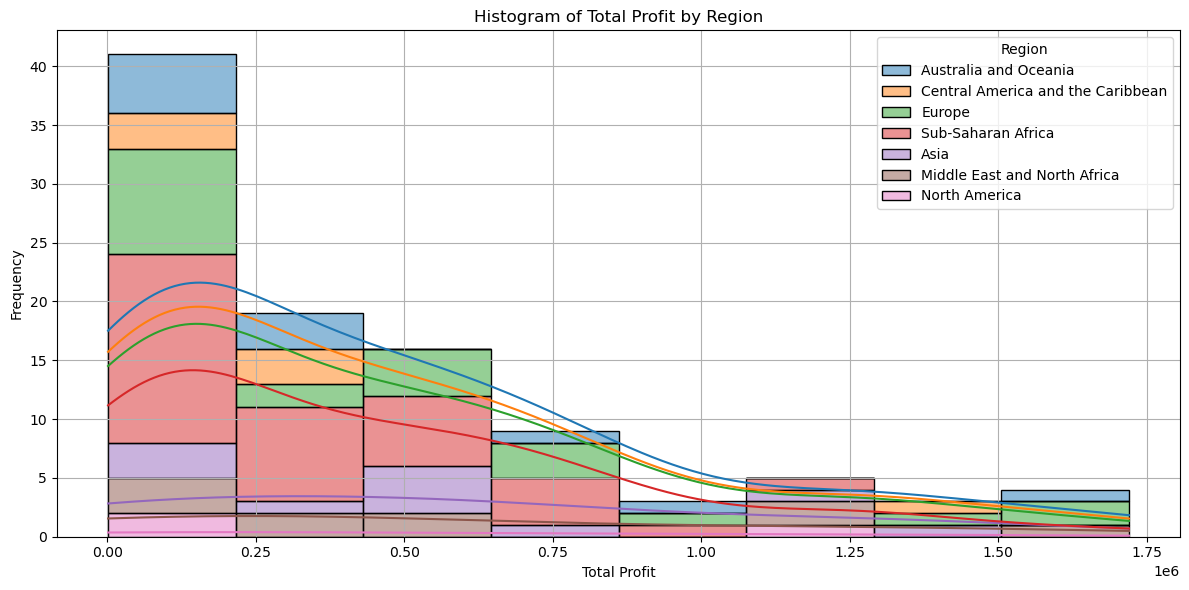

In [134]:
import seaborn as sns

# Plot histogram grouped by Region
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Total Profit', hue='Region', kde=True, multiple='stack')
plt.title('Histogram of Total Profit by Region')
plt.xlabel('Total Profit')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

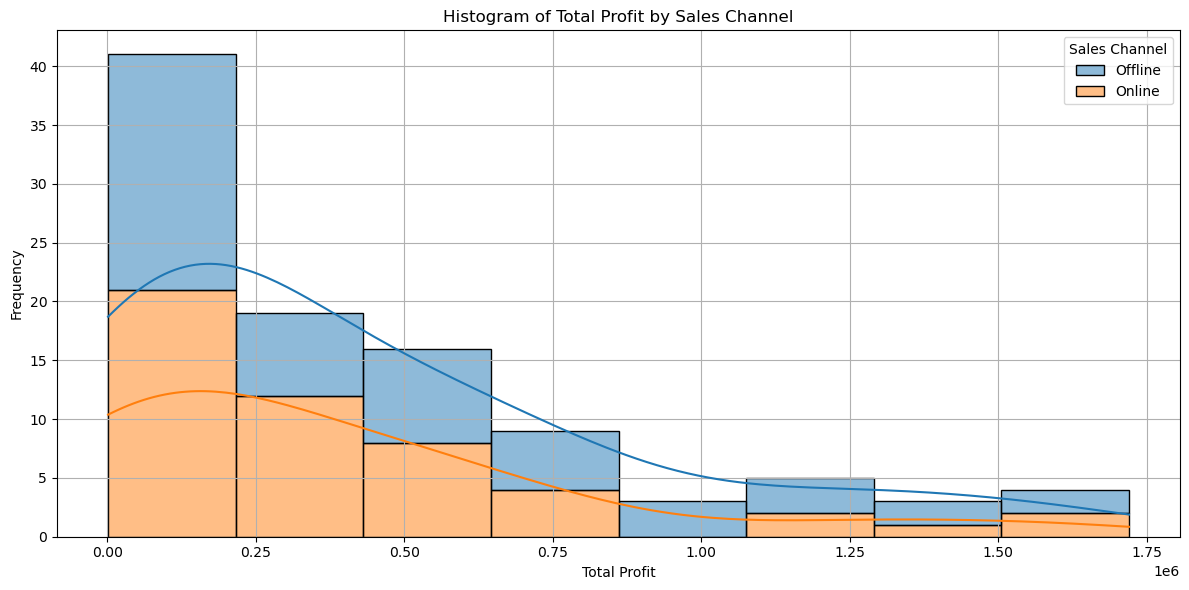

In [136]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Total Profit', hue='Sales Channel', kde=True, multiple='stack')
plt.title('Histogram of Total Profit by Sales Channel')
plt.xlabel('Total Profit')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

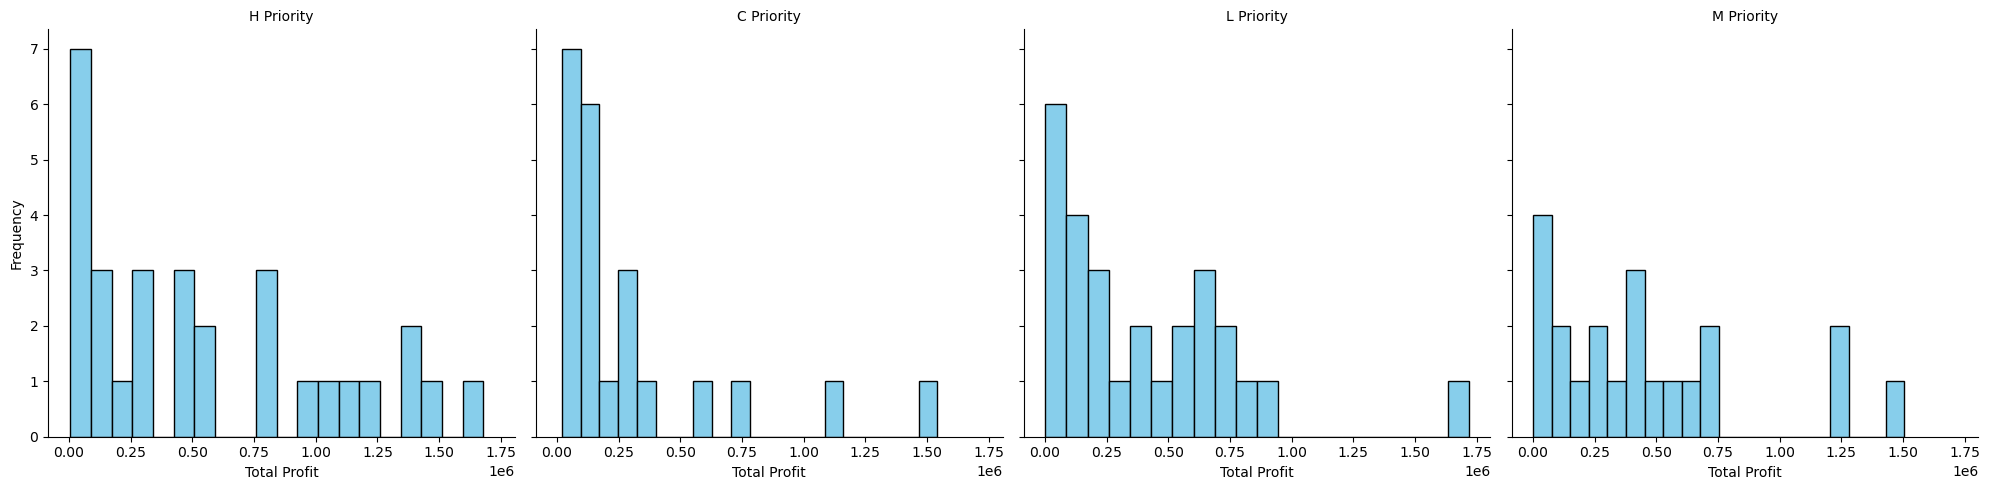

In [138]:
g = sns.FacetGrid(df, col='Order Priority', height=5)
g.map(plt.hist, 'Total Profit', bins=20, color='skyblue', edgecolor='black')
g.set_axis_labels('Total Profit', 'Frequency')
g.set_titles("{col_name} Priority")
plt.tight_layout()
plt.show()

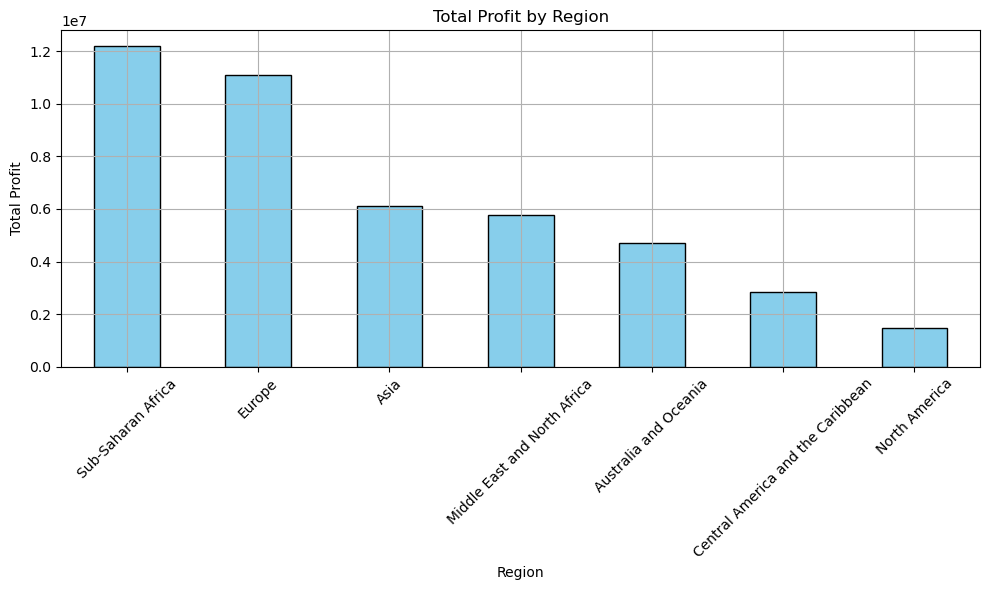

In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming AmazonSalesData is already loaded
# Group by 'Region' and calculate the total profit for each region
region_profit =df.groupby('Region')['Total Profit'].sum().sort_values(ascending=False)

# Plot a bar chart for Total Profit by Region
plt.figure(figsize=(10, 6))
region_profit.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Total Profit by Region')
plt.xlabel('Region')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

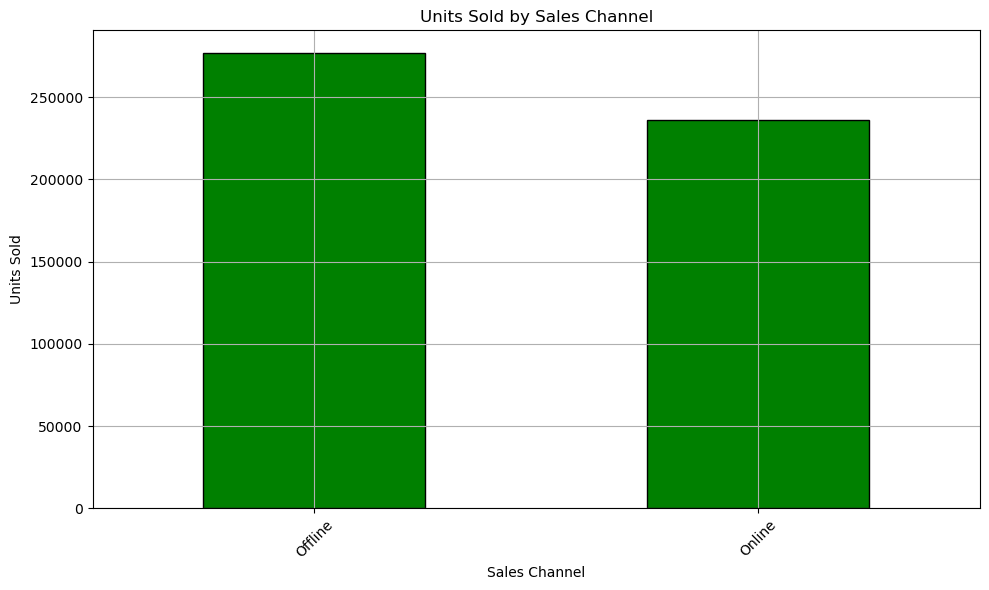

In [144]:
# Group by 'Sales Channel' and calculate the total units sold for each channel
sales_channel_units = df.groupby('Sales Channel')['Units Sold'].sum().sort_values(ascending=False)

# Plot a column chart for Units Sold by Sales Channel
plt.figure(figsize=(10, 6))
sales_channel_units.plot(kind='bar', color='green', edgecolor='black')
plt.title('Units Sold by Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Units Sold')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

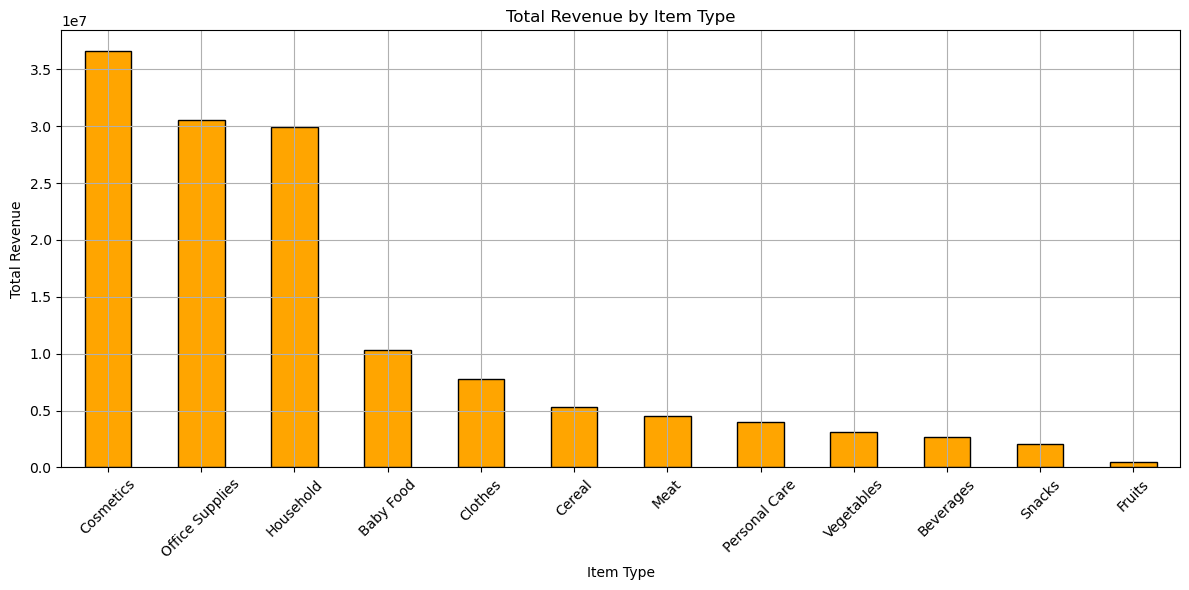

In [146]:
# Group by 'Item Type' and calculate the total revenue for each item type
item_type_revenue = df.groupby('Item Type')['Total Revenue'].sum().sort_values(ascending=False)

# Plot a bar chart for Total Revenue by Item Type
plt.figure(figsize=(12, 6))
item_type_revenue.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Total Revenue by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

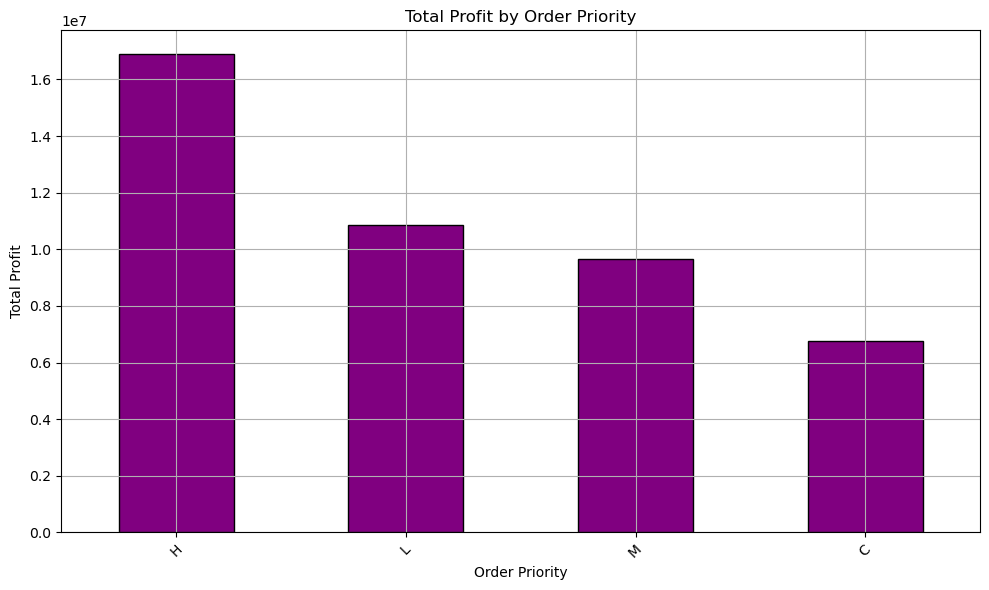

In [148]:
# Group by 'Order Priority' and calculate the total profit for each order priority
order_priority_profit = df.groupby('Order Priority')['Total Profit'].sum().sort_values(ascending=False)

# Plot a column chart for Total Profit by Order Priority
plt.figure(figsize=(10, 6))
order_priority_profit.plot(kind='bar', color='purple', edgecolor='black')
plt.title('Total Profit by Order Priority')
plt.xlabel('Order Priority')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

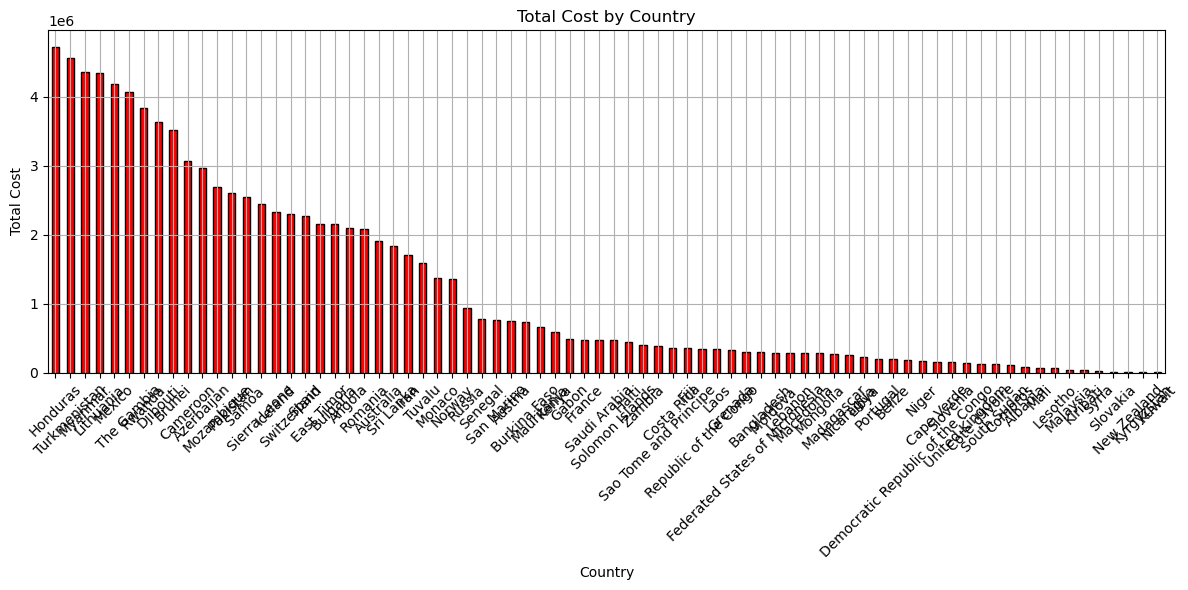

In [152]:
# Group by 'Country' and calculate the total cost for each country
country_cost = df.groupby('Country')['Total Cost'].sum().sort_values(ascending=False)

# Plot a bar chart for Total Cost by Country
plt.figure(figsize=(12, 6))
country_cost.plot(kind='bar', color='red', edgecolor='black')
plt.title('Total Cost by Country')
plt.xlabel('Country')
plt.ylabel('Total Cost')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


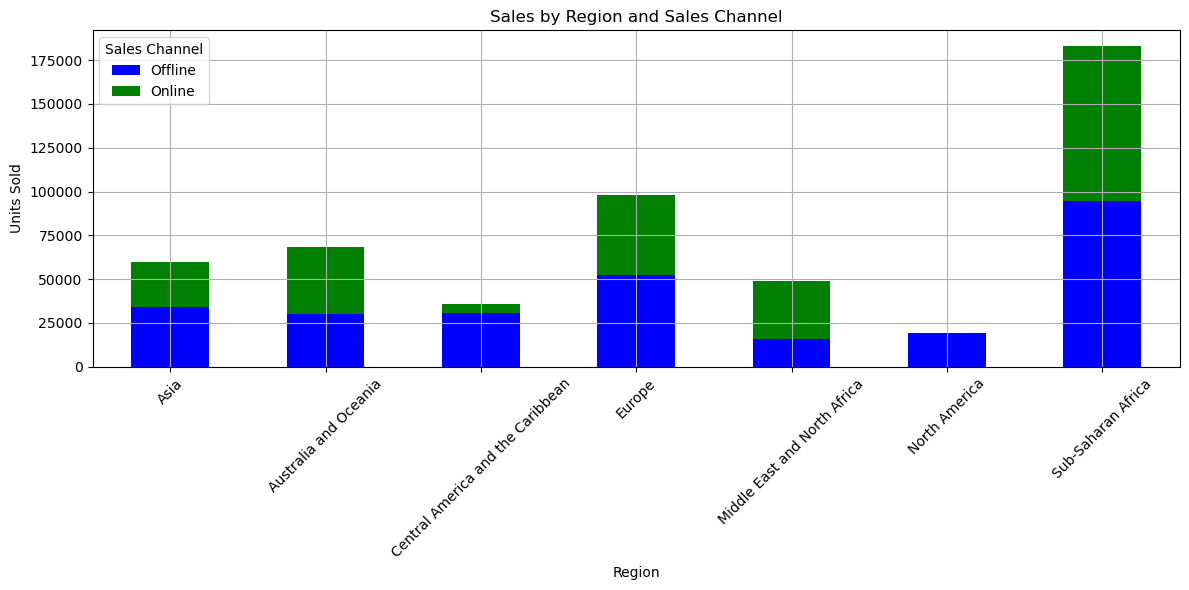

In [154]:
# Pivot data to get total units sold by region and sales channel
sales_by_region_channel = df.pivot_table(values='Units Sold', index='Region', columns='Sales Channel', aggfunc='sum')

# Plot stacked bar chart for Sales by Region and Sales Channel
sales_by_region_channel.plot(kind='bar', stacked=True, figsize=(12, 6), color=['blue', 'green', 'orange'])
plt.title('Sales by Region and Sales Channel')
plt.xlabel('Region')
plt.ylabel('Units Sold')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

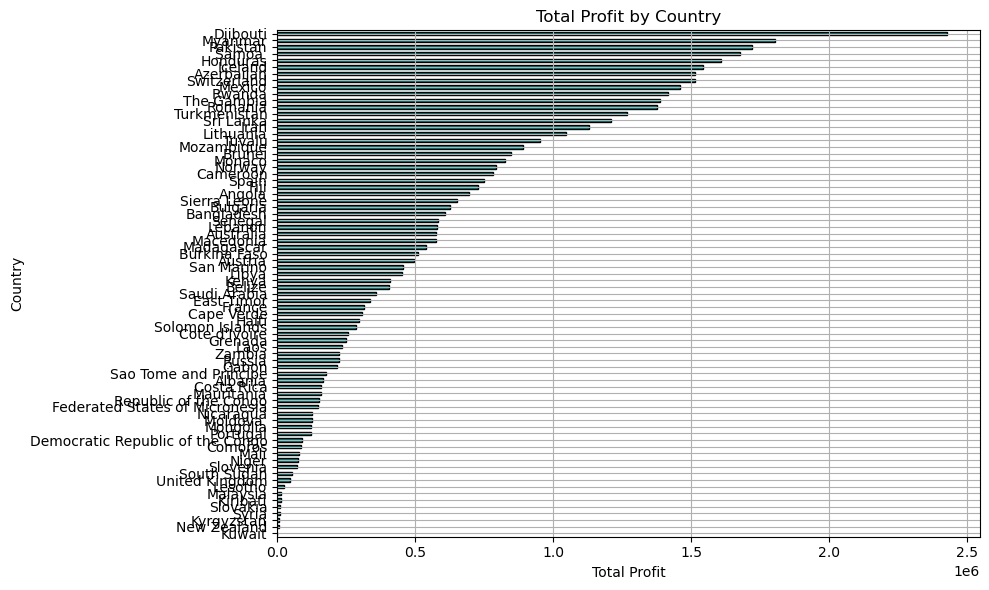

In [156]:
# Group by 'Country' and calculate the total profit for each country
country_profit = df.groupby('Country')['Total Profit'].sum().sort_values(ascending=True)

# Plot a horizontal bar chart for Total Profit by Country
plt.figure(figsize=(10, 6))
country_profit.plot(kind='barh', color='teal', edgecolor='black')
plt.title('Total Profit by Country')
plt.xlabel('Total Profit')
plt.ylabel('Country')
plt.grid(True)
plt.tight_layout()
plt.show()

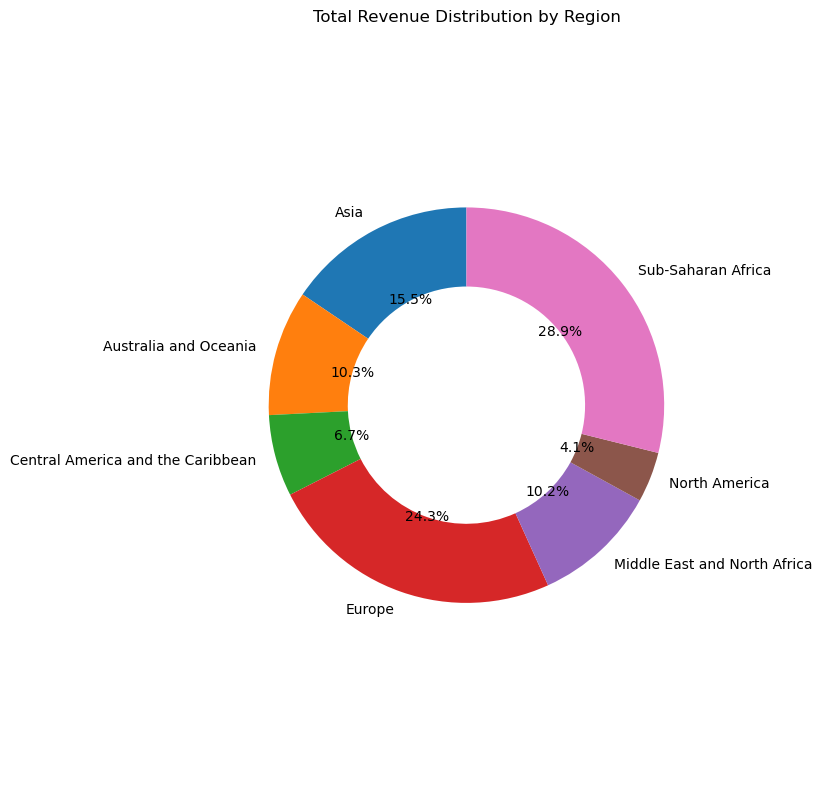

In [158]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by 'Region' and calculate the total revenue for each region
region_revenue = df.groupby('Region')['Total Revenue'].sum()

# Create a donut chart for Total Revenue by Region
plt.figure(figsize=(8, 8))
plt.pie(region_revenue, labels=region_revenue.index, autopct='%1.1f%%', startangle=90, wedgeprops={'width': 0.4})
plt.title('Total Revenue Distribution by Region')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.tight_layout()
plt.show()

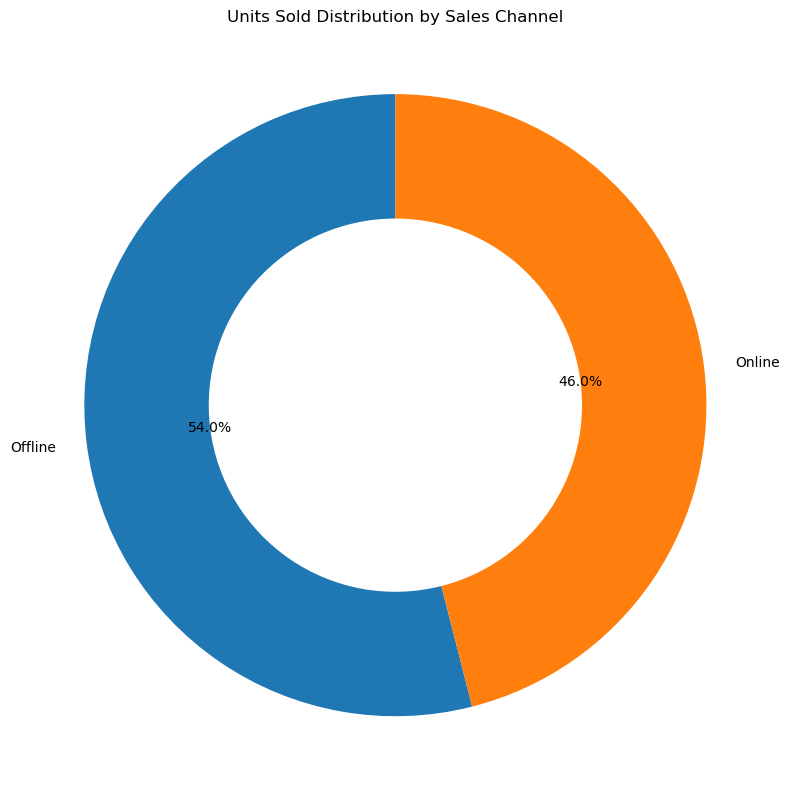

In [160]:
# Group by 'Sales Channel' and calculate the total units sold for each channel
sales_channel_units = df.groupby('Sales Channel')['Units Sold'].sum()

# Create a donut chart for Units Sold by Sales Channel
plt.figure(figsize=(8, 8))
plt.pie(sales_channel_units, labels=sales_channel_units.index, autopct='%1.1f%%', startangle=90, wedgeprops={'width': 0.4})
plt.title('Units Sold Distribution by Sales Channel')
plt.axis('equal')
plt.tight_layout()
plt.show()

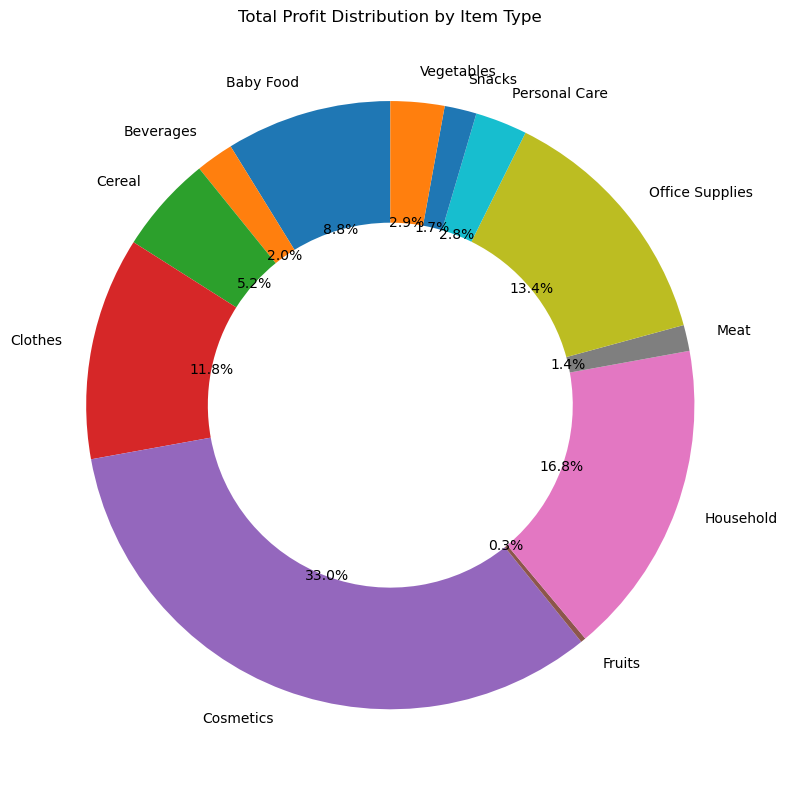

In [162]:
# Group by 'Item Type' and calculate the total profit for each item type
item_type_profit = df.groupby('Item Type')['Total Profit'].sum()

# Create a donut chart for Total Profit by Item Type
plt.figure(figsize=(8, 8))
plt.pie(item_type_profit, labels=item_type_profit.index, autopct='%1.1f%%', startangle=90, wedgeprops={'width': 0.4})
plt.title('Total Profit Distribution by Item Type')
plt.axis('equal')
plt.tight_layout()
plt.show()

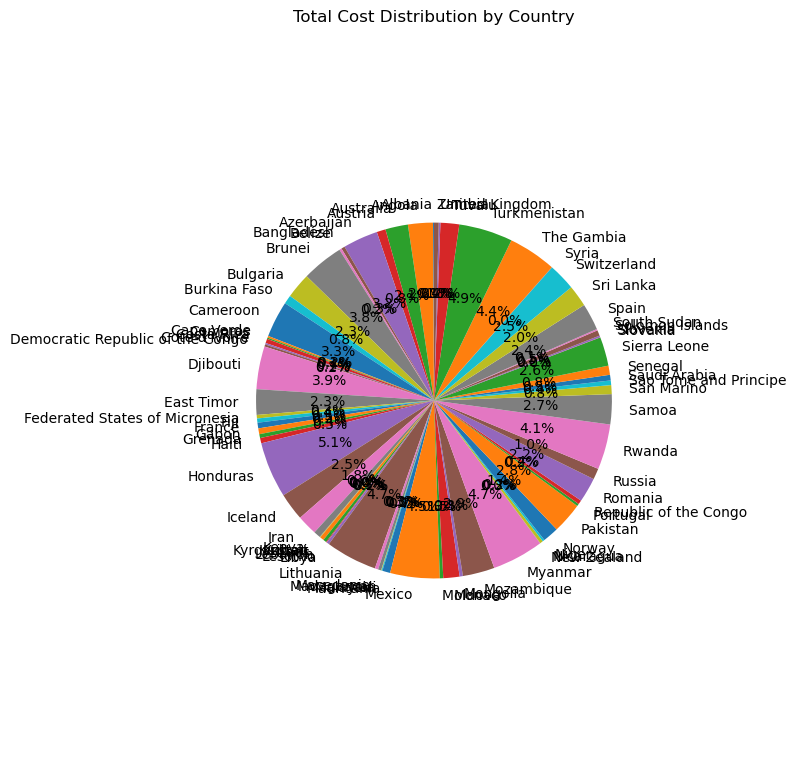

In [164]:
# Group by 'Country' and calculate the total cost for each country
country_cost = df.groupby('Country')['Total Cost'].sum()

# Create a pie chart for Total Cost by Country
plt.figure(figsize=(8, 8))
plt.pie(country_cost, labels=country_cost.index, autopct='%1.1f%%', startangle=90)
plt.title('Total Cost Distribution by Country')
plt.axis('equal')  # Ensures that pie chart is drawn as a circle.
plt.tight_layout()
plt.show()

In [169]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


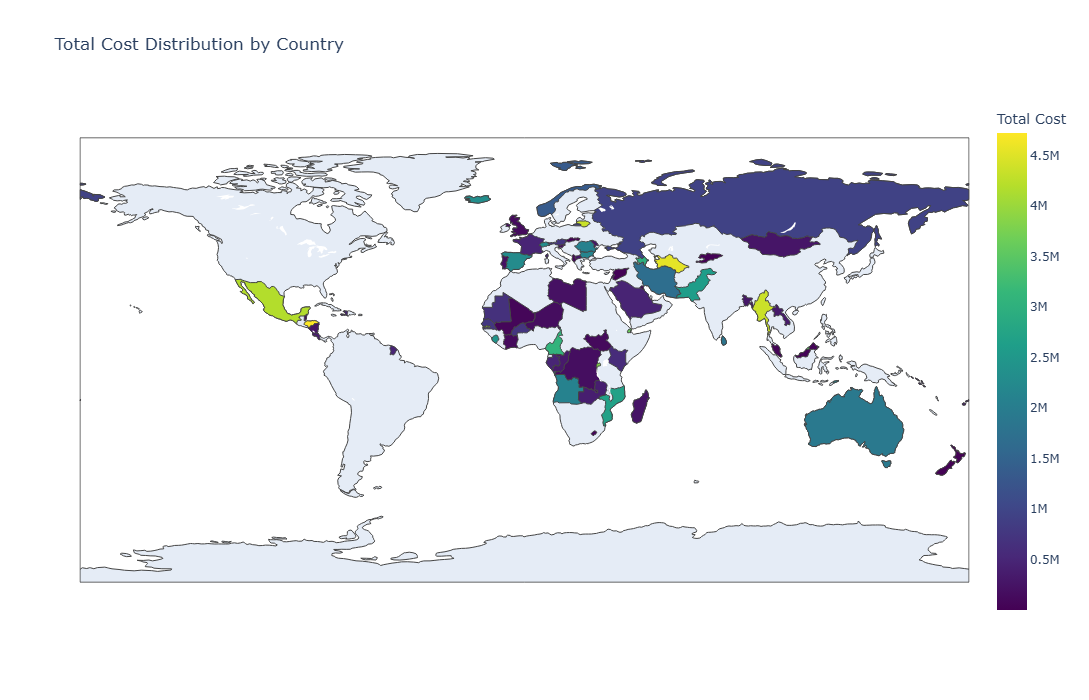

In [173]:
import plotly.express as px

# Group by 'Country' and calculate the total cost for each country
country_cost = df.groupby('Country')['Total Cost'].sum().reset_index()

# Create a choropleth map for Total Cost by Country
fig = px.choropleth(country_cost, 
                    locations='Country', 
                    locationmode='country names', 
                    color='Total Cost', 
                    color_continuous_scale='Viridis', 
                    title='Total Cost Distribution by Country')

# Adjusting map size for a larger visual
fig.update_layout(
    width=1000,  # Width of the map
    height=700,  # Height of the map
)

# Show the map
fig.show()


In [175]:
pip install matplotlib seaborn pandas

Note: you may need to restart the kernel to use updated packages.


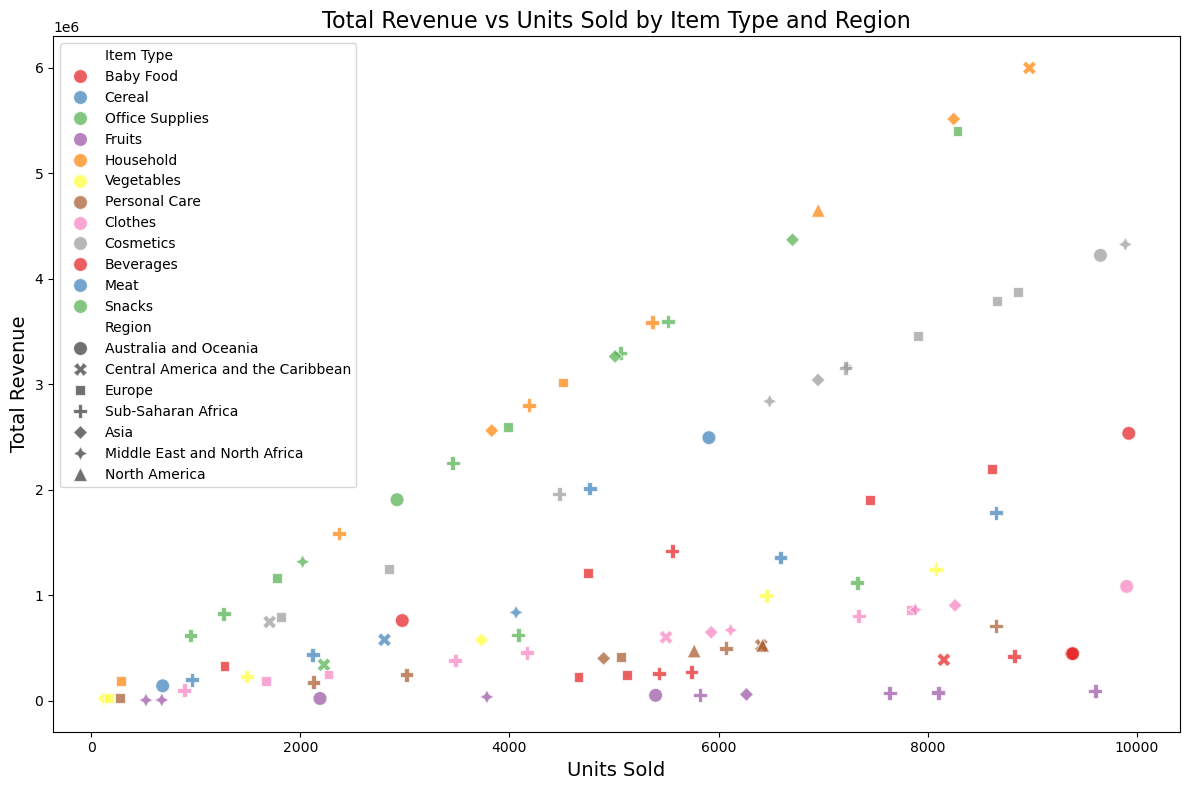

In [187]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


plt.figure(figsize=(12, 8))
sns.scatterplot(x='Units Sold', 
                y='Total Revenue', 
                hue='Item Type',  
                style='Region',   
                data=df, 
                palette='Set1', 
                s=100,  
                alpha=0.7)  


plt.title('Total Revenue vs Units Sold by Item Type and Region', fontsize=16)
plt.xlabel('Units Sold', fontsize=14)
plt.ylabel('Total Revenue', fontsize=14)


plt.tight_layout()
plt.show()


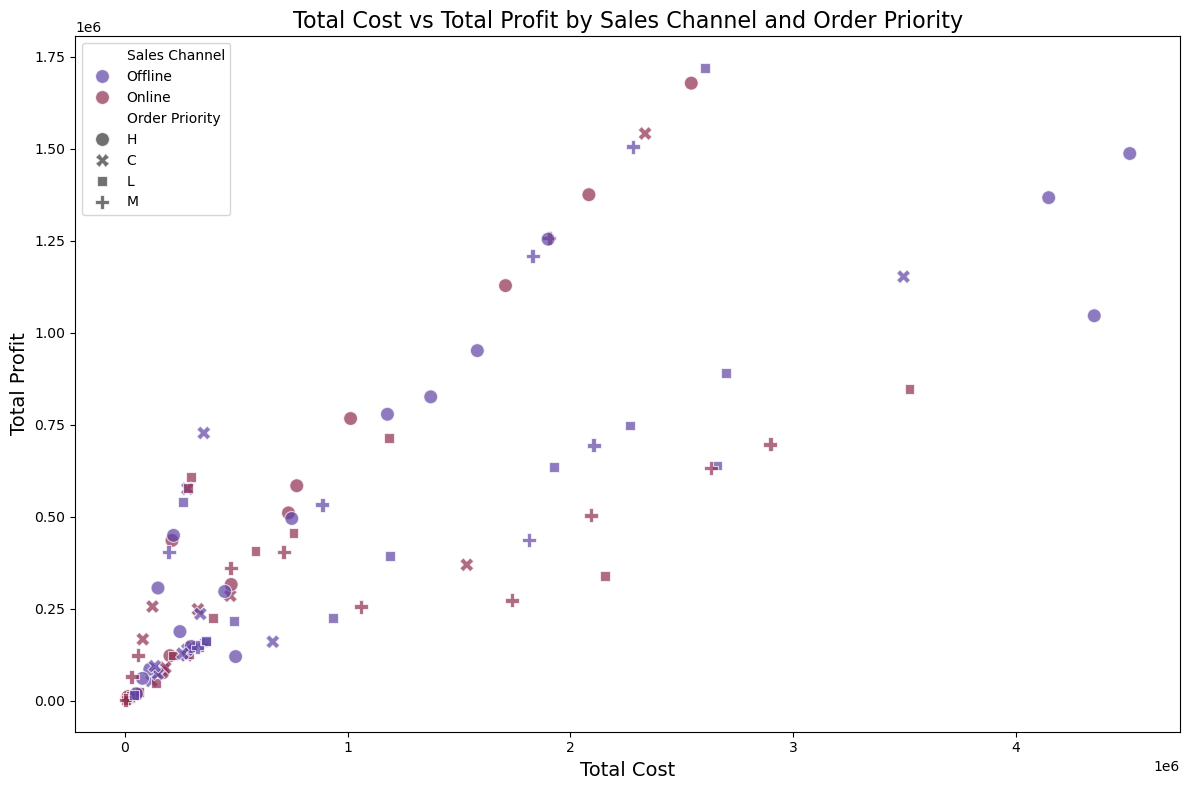

In [183]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Total Cost', 
                y='Total Profit', 
                hue='Sales Channel', 
                style='Order Priority', 
                data=df, 
                palette='twilight', 
                s=100, 
                alpha=0.7)  


plt.title('Total Cost vs Total Profit by Sales Channel and Order Priority', fontsize=16)
plt.xlabel('Total Cost', fontsize=14)
plt.ylabel('Total Profit', fontsize=14)


plt.tight_layout()
plt.show()

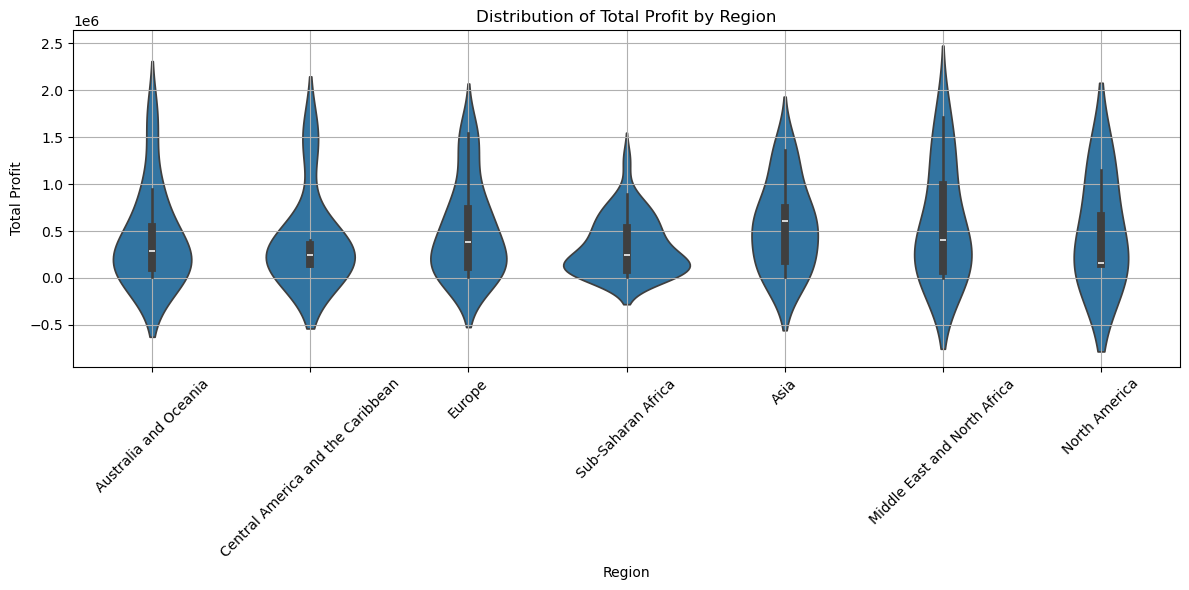

In [189]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data (if CSV: pd.read_csv('file.csv'))
# Make sure 'Order Date' is datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Optional: filter or clean data
df = df.dropna(subset=['Total Profit', 'Region'])

# Violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='Region', y='Total Profit', data=df)
plt.title('Distribution of Total Profit by Region')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()